In [263]:
## Python program for linear regression  
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import math 
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import qqplot
from scipy import stats


In [264]:
import os 
os.chdir("C:\\Users\\sumeera\\Desktop\\data science\\dataset")
x =  pd.read_csv("Churn_MV.csv")

In [265]:
x.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Intl Plan,VMail Plan,...,Daily Charges MV,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,128.0,25.0,265.1,197.4,244.7,10.0,1.0,0.0,0.0,1.0,...,45.07,99.0,16.78,91.0,11.01,3.0,2.7,KS,415.0,382-4657
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,107.0,26.0,161.6,195.5,254.4,13.7,1.0,0.0,0.0,1.0,...,27.47,103.0,16.62,103.0,11.45,3.0,3.7,OH,415.0,371-7191
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [266]:
list(x.columns)

['Account Length',
 'VMail Message',
 'Day Mins',
 'Eve Mins',
 'Night Mins',
 'Intl Mins',
 'CustServ Calls',
 'Churn',
 'Intl Plan',
 'VMail Plan',
 'Day Calls',
 'Day Charge',
 'Daily Charges MV',
 'Eve Calls',
 'Eve Charge',
 'Night Calls',
 'Night Charge',
 'Intl Calls',
 'Intl Charge',
 'State',
 'Area Code',
 'Phone']

In [267]:
x.dtypes

Account Length      float64
VMail Message       float64
Day Mins            float64
Eve Mins            float64
Night Mins          float64
Intl Mins           float64
CustServ Calls      float64
Churn               float64
Intl Plan           float64
VMail Plan          float64
Day Calls           float64
Day Charge          float64
Daily Charges MV    float64
Eve Calls           float64
Eve Charge          float64
Night Calls         float64
Night Charge        float64
Intl Calls          float64
Intl Charge         float64
State                object
Area Code           float64
Phone                object
dtype: object

In [268]:
x["Area Code"] = x["Area Code"].astype('object')
x["Intl Plan"] = x["Intl Plan"].astype('object')
x["VMail Plan"] = x["VMail Plan"].astype('object')
x["Churn"]= x["Churn"].astype('object')

In [269]:
 x.dtypes

Account Length      float64
VMail Message       float64
Day Mins            float64
Eve Mins            float64
Night Mins          float64
Intl Mins           float64
CustServ Calls      float64
Churn                object
Intl Plan            object
VMail Plan           object
Day Calls           float64
Day Charge          float64
Daily Charges MV    float64
Eve Calls           float64
Eve Charge          float64
Night Calls         float64
Night Charge        float64
Intl Calls          float64
Intl Charge         float64
State                object
Area Code            object
Phone                object
dtype: object

In [270]:
x.isnull().sum()

Account Length      3333
VMail Message       3333
Day Mins            3333
Eve Mins            3333
Night Mins          3333
Intl Mins           3333
CustServ Calls      3333
Churn               3333
Intl Plan           3333
VMail Plan          3333
Day Calls           3333
Day Charge          3333
Daily Charges MV    3383
Eve Calls           3333
Eve Charge          3333
Night Calls         3333
Night Charge        3333
Intl Calls          3333
Intl Charge         3333
State               3333
Area Code           3333
Phone               3333
dtype: int64

In [271]:
x = x.dropna(how='all') 

In [272]:
x.isnull().sum()

Account Length       0
VMail Message        0
Day Mins             0
Eve Mins             0
Night Mins           0
Intl Mins            0
CustServ Calls       0
Churn                0
Intl Plan            0
VMail Plan           0
Day Calls            0
Day Charge           0
Daily Charges MV    50
Eve Calls            0
Eve Charge           0
Night Calls          0
Night Charge         0
Intl Calls           0
Intl Charge          0
State                0
Area Code            0
Phone                0
dtype: int64

In [273]:
a = x["Daily Charges MV"].mean()
a

30.533475479744165

In [274]:
b = x["Daily Charges MV"].median()
b

30.5

In [275]:
x["Daily Charges MV"].fillna(a)

1       45.070000
3       27.470000
5       41.380000
7       50.900000
9       28.340000
11      37.980000
13      30.533475
15      26.690000
17      31.370000
19      43.960000
21      21.950000
23      30.533475
25      21.900000
27      26.620000
29      20.520000
31      30.533475
33      33.390000
35      32.420000
37      32.250000
39      38.150000
41      26.370000
43      10.610000
45      31.110000
47      18.770000
49      13.790000
51      21.130000
53      36.210000
55      22.830000
57      32.300000
59      20.280000
          ...    
6607    23.310000
6609    31.640000
6611    38.100000
6613    14.210000
6615    34.660000
6617    35.920000
6619    37.300000
6621    32.370000
6623    25.110000
6625    39.080000
6627    17.480000
6629    30.380000
6631    25.250000
6633    27.900000
6635    33.520000
6637    21.230000
6639    19.620000
6641    23.800000
6643    32.960000
6645    54.590000
6647    20.130000
6649    28.870000
6651    32.880000
6653    18.120000
6655    22

In [276]:
x.isnull().sum()

Account Length       0
VMail Message        0
Day Mins             0
Eve Mins             0
Night Mins           0
Intl Mins            0
CustServ Calls       0
Churn                0
Intl Plan            0
VMail Plan           0
Day Calls            0
Day Charge           0
Daily Charges MV    50
Eve Calls            0
Eve Charge           0
Night Calls          0
Night Charge         0
Intl Calls           0
Intl Charge          0
State                0
Area Code            0
Phone                0
dtype: int64

In [277]:
x["Daily Charges MV_mean"]=x["Daily Charges MV"].fillna(a)

In [278]:
x["Daily Charges MV_median"] = x["Daily Charges MV"].fillna(b)

In [279]:
x.isnull().sum()

Account Length              0
VMail Message               0
Day Mins                    0
Eve Mins                    0
Night Mins                  0
Intl Mins                   0
CustServ Calls              0
Churn                       0
Intl Plan                   0
VMail Plan                  0
Day Calls                   0
Day Charge                  0
Daily Charges MV           50
Eve Calls                   0
Eve Charge                  0
Night Calls                 0
Night Charge                0
Intl Calls                  0
Intl Charge                 0
State                       0
Area Code                   0
Phone                       0
Daily Charges MV_mean       0
Daily Charges MV_median     0
dtype: int64

In [280]:
x.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Intl Plan,VMail Plan,...,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Daily Charges MV_mean,Daily Charges MV_median
1,128.0,25.0,265.1,197.4,244.7,10.0,1.0,0,0,1,...,16.78,91.0,11.01,3.0,2.70,KS,415,382-4657,45.07,45.07
3,107.0,26.0,161.6,195.5,254.4,13.7,1.0,0,0,1,...,16.62,103.0,11.45,3.0,3.70,OH,415,371-7191,27.47,27.47
5,137.0,0.0,243.4,121.2,162.6,12.2,0.0,0,0,0,...,10.30,104.0,7.32,5.0,3.29,NJ,415,358-1921,41.38,41.38
7,84.0,0.0,299.4,61.9,196.9,6.6,2.0,0,1,0,...,5.26,89.0,8.86,7.0,1.78,OH,408,375-9999,50.90,50.90
9,75.0,0.0,166.7,148.3,186.9,10.1,3.0,0,1,0,...,12.61,121.0,8.41,3.0,2.73,OK,415,330-6626,28.34,28.34


In [281]:
x["Daily Charges MV_mean"].mean()

30.533475479744162

In [282]:
x["Daily Charges MV_median"].mean()

30.532973297329757

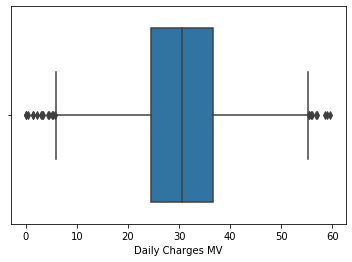

In [283]:
seabornInstance.boxplot(x["Daily Charges MV"])

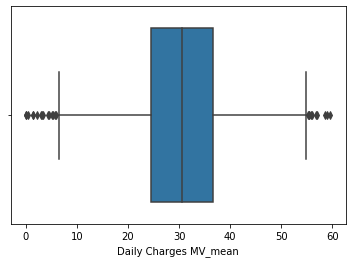

In [284]:
seabornInstance.boxplot(x["Daily Charges MV_mean"])

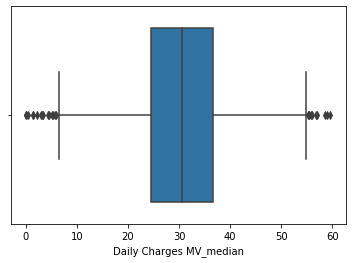

In [285]:
seabornInstance.boxplot(x["Daily Charges MV_median"])

In [286]:
print("Mean abs error", metrics.mean_absolute_error(x["Day Charge"],x["Daily Charges MV_mean"])) #actual :day charge and pred = Daily Charge mv_mean

Mean abs error 0.14500933035734276


In [287]:
print("mean sqrt error",metrics.mean_squared_error(x["Day Charge"],x["Daily Charges MV_mean"]))

mean sqrt error 2.26698281880529


In [288]:
print("RMSE",np.sqrt(metrics.mean_squared_error(x["Day Charge"],x["Daily Charges MV_mean"])))

RMSE 1.5056502976472623


In [289]:
print("Mean abs error", metrics.mean_absolute_error(x["Day Charge"],x["Daily Charges MV_median"]))

Mean abs error 0.14504950495049507


In [290]:
print("mean sqrt error",metrics.mean_squared_error(x["Day Charge"],x["Daily Charges MV_median"]))

mean sqrt error 2.268929942994299


In [291]:
print("RMSE",np.sqrt(metrics.mean_squared_error(x["Day Charge"],x["Daily Charges MV_median"])))

RMSE 1.5062967645833603


In [292]:
from scipy.stats import iqr

In [293]:
upper = x["Day Charge"].quantile(0.75)+(iqr(x["Day Charge"])*1.5)
upper

55.33

In [294]:
iqr(x["Day Charge"])

12.36

In [295]:
lower = x["Day Charge"].quantile(0.25)- (iqr(x["Day Charge"])*1.5)
lower

5.890000000000001

In [296]:
x["Day Charge"].clip(upper = 55.33 , lower = 5.890000000000001,inplace=True)

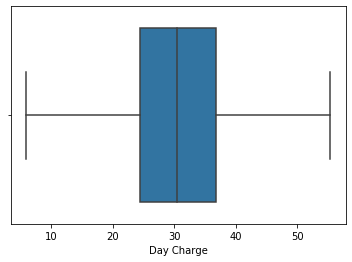

In [297]:
seabornInstance.boxplot(x["Day Charge"])

In [298]:
x["Day Charge"].value_counts()

5.89     14
55.33    11
26.18     8
29.67     8
27.12     8
29.82     7
27.59     7
31.18     7
31.45     6
26.10     6
36.72     6
35.05     6
26.71     6
24.87     6
28.53     6
24.19     6
30.86     6
31.37     6
33.73     6
26.38     6
38.66     6
28.66     6
35.17     6
30.38     6
32.18     6
28.99     6
36.65     6
33.49     6
25.50     6
32.27     6
         ..
37.04     1
16.01     1
17.95     1
23.94     1
32.79     1
47.82     1
19.26     1
11.46     1
43.84     1
49.08     1
45.08     1
10.20     1
45.10     1
23.53     1
50.01     1
17.20     1
45.99     1
11.51     1
27.39     1
14.79     1
46.48     1
37.96     1
43.72     1
39.19     1
54.67     1
46.19     1
50.39     1
44.42     1
10.68     1
15.86     1
Name: Day Charge, Length: 1645, dtype: int64

# scaling and correlation

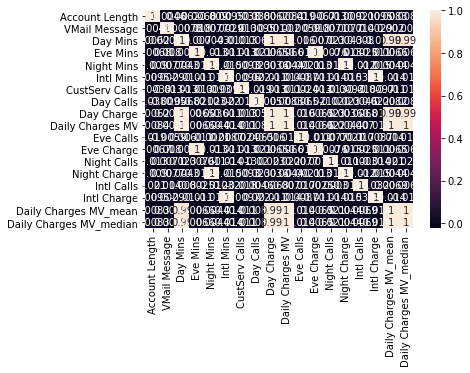

In [299]:
sns.heatmap(x.corr(),annot=True)

In [300]:
x.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Intl Plan,VMail Plan,...,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Daily Charges MV_mean,Daily Charges MV_median
1,128.0,25.0,265.1,197.4,244.7,10.0,1.0,0,0,1,...,16.78,91.0,11.01,3.0,2.70,KS,415,382-4657,45.07,45.07
3,107.0,26.0,161.6,195.5,254.4,13.7,1.0,0,0,1,...,16.62,103.0,11.45,3.0,3.70,OH,415,371-7191,27.47,27.47
5,137.0,0.0,243.4,121.2,162.6,12.2,0.0,0,0,0,...,10.30,104.0,7.32,5.0,3.29,NJ,415,358-1921,41.38,41.38
7,84.0,0.0,299.4,61.9,196.9,6.6,2.0,0,1,0,...,5.26,89.0,8.86,7.0,1.78,OH,408,375-9999,50.90,50.90
9,75.0,0.0,166.7,148.3,186.9,10.1,3.0,0,1,0,...,12.61,121.0,8.41,3.0,2.73,OK,415,330-6626,28.34,28.34


In [301]:
x.columns

Index(['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls', 'Churn', 'Intl Plan', 'VMail Plan',
       'Day Calls', 'Day Charge', 'Daily Charges MV', 'Eve Calls',
       'Eve Charge', 'Night Calls', 'Night Charge', 'Intl Calls',
       'Intl Charge', 'State', 'Area Code', 'Phone', 'Daily Charges MV_mean',
       'Daily Charges MV_median'],
      dtype='object')

In [302]:
x['Intl Plan'].value_counts()

0.0    3010
1.0     323
Name: Intl Plan, dtype: int64

In [303]:
x['VMail Plan'].value_counts()

0.0    2411
1.0     922
Name: VMail Plan, dtype: int64

In [304]:
y1 = pd.crosstab(x['VMail Plan'],x['Intl Plan'])
y1

Intl Plan,0.0,1.0
VMail Plan,,
0.0,2180,231
1.0,830,92


In [305]:
chi2_contingency(y1)

(0.07913866043199172,
 0.7784680822485827,
 1,
 array([[2177.35073507,  233.64926493],
        [ 832.64926493,   89.35073507]]))

In [306]:
y = pd.crosstab(x.State , x.Phone)
y.head()

Phone,327-1058,327-1319,327-3053,327-3587,327-3850,327-3954,327-4795,327-5525,327-5817,327-6087,...,422-5350,422-5865,422-5874,422-6685,422-6690,422-7728,422-8268,422-8333,422-8344,422-9964
State,,,,,,,,,,,,,,,,,,,,,
AK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AZ,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [307]:
from scipy.stats import chi2_contingency

In [308]:
print(chi2_contingency(y))

(166650.0, 0.4650312889733844, 166600, array([[0.01560156, 0.01560156, 0.01560156, ..., 0.01560156, 0.01560156,
        0.01560156],
       [0.0240024 , 0.0240024 , 0.0240024 , ..., 0.0240024 , 0.0240024 ,
        0.0240024 ],
       [0.01650165, 0.01650165, 0.01650165, ..., 0.01650165, 0.01650165,
        0.01650165],
       ...,
       [0.02340234, 0.02340234, 0.02340234, ..., 0.02340234, 0.02340234,
        0.02340234],
       [0.03180318, 0.03180318, 0.03180318, ..., 0.03180318, 0.03180318,
        0.03180318],
       [0.02310231, 0.02310231, 0.02310231, ..., 0.02310231, 0.02310231,
        0.02310231]]))


In [309]:
x.dtypes

Account Length             float64
VMail Message              float64
Day Mins                   float64
Eve Mins                   float64
Night Mins                 float64
Intl Mins                  float64
CustServ Calls             float64
Churn                       object
Intl Plan                   object
VMail Plan                  object
Day Calls                  float64
Day Charge                 float64
Daily Charges MV           float64
Eve Calls                  float64
Eve Charge                 float64
Night Calls                float64
Night Charge               float64
Intl Calls                 float64
Intl Charge                float64
State                       object
Area Code                   object
Phone                       object
Daily Charges MV_mean      float64
Daily Charges MV_median    float64
dtype: object

In [310]:
#xnum= x.drop(['Churn','Intl Plan','VMail Plan','State','Area Code','Phone'],axis=1,)
#xnum.head()

In [311]:
#from scipy.stats import zscore
#zscore(xnum)

In [312]:
print(xnum.min())
print(xnum.max())

Account Length              1.00
VMail Message               0.00
Day Mins                    0.00
Eve Mins                    0.00
Night Mins                 23.20
Intl Mins                   0.00
CustServ Calls              0.00
Day Calls                   0.00
Day Charge                  5.89
Daily Charges MV            0.00
Eve Calls                   0.00
Eve Charge                  0.00
Night Calls                33.00
Night Charge                1.04
Intl Calls                  0.00
Intl Charge                 0.00
Daily Charges MV_mean       0.00
Daily Charges MV_median     0.00
dtype: float64
Account Length             243.00
VMail Message               51.00
Day Mins                   350.80
Eve Mins                   363.70
Night Mins                 395.00
Intl Mins                   20.00
CustServ Calls               9.00
Day Calls                  165.00
Day Charge                  55.33
Daily Charges MV            59.64
Eve Calls                  170.00
Eve Charge       

In [313]:
num = x.loc[:,x.dtypes==np.float64]
num

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Day Calls,Day Charge,Daily Charges MV,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Daily Charges MV_mean,Daily Charges MV_median
1,128.0,25.0,265.1,197.4,244.7,10.0,1.0,110.0,45.07,45.07,99.0,16.78,91.0,11.01,3.0,2.70,45.070000,45.07
3,107.0,26.0,161.6,195.5,254.4,13.7,1.0,123.0,27.47,27.47,103.0,16.62,103.0,11.45,3.0,3.70,27.470000,27.47
5,137.0,0.0,243.4,121.2,162.6,12.2,0.0,114.0,41.38,41.38,110.0,10.30,104.0,7.32,5.0,3.29,41.380000,41.38
7,84.0,0.0,299.4,61.9,196.9,6.6,2.0,71.0,50.90,50.90,88.0,5.26,89.0,8.86,7.0,1.78,50.900000,50.90
9,75.0,0.0,166.7,148.3,186.9,10.1,3.0,113.0,28.34,28.34,122.0,12.61,121.0,8.41,3.0,2.73,28.340000,28.34
11,118.0,0.0,223.4,220.6,203.9,6.3,0.0,98.0,37.98,37.98,101.0,18.75,118.0,9.18,6.0,1.70,37.980000,37.98
13,121.0,24.0,218.2,348.5,212.6,7.5,3.0,88.0,37.09,NaN,108.0,29.62,118.0,9.57,7.0,2.03,30.533475,30.50
15,147.0,0.0,157.0,103.1,211.8,7.1,0.0,79.0,26.69,26.69,94.0,8.76,96.0,9.53,6.0,1.92,26.690000,26.69
17,117.0,0.0,184.5,351.6,215.8,8.7,1.0,97.0,31.37,31.37,80.0,29.89,90.0,9.71,4.0,2.35,31.370000,31.37
19,141.0,37.0,258.6,222.0,326.4,11.2,0.0,84.0,43.96,43.96,111.0,18.87,97.0,14.69,5.0,3.02,43.960000,43.96


In [314]:
cat = x.loc[:,x.dtypes==np.object]
#sep cat and num

In [342]:
from scipy.stats import zscore
num.apply(zscore)

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Day Calls,Day Charge,Daily Charges MV,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Daily Charges MV_mean,Daily Charges MV_median
1,0.676489,1.234883,1.566767,-0.070610,0.866743,-0.085008,-0.427932,0.476643,1.575396,NaN,-0.055940,-0.070427,-0.465494,0.866029,-0.601195,-0.085690,1.591328e+00,1.591383
3,0.149065,1.307948,-0.333738,-0.108080,1.058571,1.240482,-0.427932,1.124503,-0.336715,NaN,0.144867,-0.107549,0.147825,1.059390,-0.601195,1.241169,-3.353618e-01,-0.335307
5,0.902529,-0.591760,1.168304,-1.573383,-0.756869,0.703121,-1.188218,0.675985,1.174505,NaN,0.496279,-1.573900,0.198935,-0.755571,0.211534,0.697156,1.187380e+00,1.187435
7,-0.428590,-0.591760,2.196596,-2.742865,-0.078551,-1.303026,0.332354,-1.466936,2.208783,NaN,-0.608159,-2.743268,-0.567714,-0.078806,1.024263,-1.306401,2.229544e+00,2.229599
9,-0.654629,-0.591760,-0.240090,-1.038932,-0.276311,-0.049184,1.092641,0.626149,-0.242196,NaN,1.098699,-1.037939,1.067803,-0.276562,-0.601195,-0.045885,-2.401220e-01,-0.240067
11,0.425335,-0.591760,0.801056,0.386928,0.059881,-1.410498,-1.188218,-0.121381,0.805119,NaN,0.044463,0.386648,0.914473,0.061821,0.617898,-1.412550,8.151787e-01,0.815234
13,0.500681,1.161817,0.705572,2.909300,0.231933,-0.980610,1.092641,-0.619735,0.708427,NaN,0.395875,2.908677,0.914473,0.233209,1.024263,-0.974686,3.111354e-15,-0.003610
15,1.153683,-0.591760,-0.418205,-1.930341,0.216112,-1.123906,-1.188218,-1.068253,-0.421457,NaN,-0.306949,-1.931206,-0.209945,0.215631,0.617898,-1.120641,-4.207492e-01,-0.420694
17,0.400220,-0.591760,0.086760,2.970436,0.295216,-0.550721,-0.427932,-0.171217,0.086991,NaN,-1.009773,2.971322,-0.516604,0.294733,-0.194831,-0.550091,9.157520e-02,0.091630
19,1.002990,2.111671,1.447412,0.414538,2.482445,0.344880,-1.188218,-0.819076,1.454803,NaN,0.546480,0.414490,-0.158835,2.483233,0.211534,0.338904,1.469815e+00,1.469870


In [354]:
zscat =pd.concat([num,cat],axis=1)

In [355]:
zscat.shape

(3333, 24)

In [336]:
# df = pd.DataFrame(numscore,columns=['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',
#        'Intl Mins', 'CustServ Calls','Day Calls', 'Day Charge', 'Daily Charges MV', 'Eve Calls',
#        'Eve Charge', 'Night Calls', 'Night Charge', 'Intl Calls',
#        'Intl Charge', 'Daily Charges MV_mean',
#        'Daily Charges MV_median'])

In [337]:
# df.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Day Calls,Day Charge,Daily Charges MV,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Daily Charges MV_mean,Daily Charges MV_median
0,0.676489,1.234883,1.566767,-0.070610,0.866743,-0.085008,-0.427932,0.476643,1.575396,NaN,-0.055940,-0.070427,-0.465494,0.866029,-0.601195,-0.085690,1.591328,1.591383
1,0.149065,1.307948,-0.333738,-0.108080,1.058571,1.240482,-0.427932,1.124503,-0.336715,NaN,0.144867,-0.107549,0.147825,1.059390,-0.601195,1.241169,-0.335362,-0.335307
2,0.902529,-0.591760,1.168304,-1.573383,-0.756869,0.703121,-1.188218,0.675985,1.174505,NaN,0.496279,-1.573900,0.198935,-0.755571,0.211534,0.697156,1.187380,1.187435
3,-0.428590,-0.591760,2.196596,-2.742865,-0.078551,-1.303026,0.332354,-1.466936,2.208783,NaN,-0.608159,-2.743268,-0.567714,-0.078806,1.024263,-1.306401,2.229544,2.229599
4,-0.654629,-0.591760,-0.240090,-1.038932,-0.276311,-0.049184,1.092641,0.626149,-0.242196,NaN,1.098699,-1.037939,1.067803,-0.276562,-0.601195,-0.045885,-0.240122,-0.240067


In [340]:
# b = pd.concat([df,cat],axis = 1)

In [348]:
from sklearn.preprocessing import minmax_scale
num1=num.apply(minmax_scale)

In [345]:
# minmaxscore = minmax_scale(num)
# minmaxscore

array([[0.52479339, 0.49019608, 0.75570125, ..., 0.5       , 0.75570087,
        0.75570087],
       [0.43801653, 0.50980392, 0.46066135, ..., 0.68518519, 0.46059691,
        0.46059691],
       [0.56198347, 0.        , 0.69384265, ..., 0.60925926, 0.69382964,
        0.69382964],
       ...,
       [0.11157025, 0.        , 0.51539339, ..., 0.70555556, 0.51542589,
        0.51542589],
       [0.75619835, 0.        , 0.60946408, ..., 0.25      , 0.60949027,
        0.60949027],
       [0.30165289, 0.49019608, 0.668187  , ..., 0.68518519, 0.66817572,
        0.66817572]])

In [349]:
num1.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Day Calls,Day Charge,Daily Charges MV,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Daily Charges MV_mean,Daily Charges MV_median
1,0.524793,0.490196,0.755701,0.542755,0.595750,0.500,0.111111,0.666667,0.792476,0.755701,0.582353,0.542866,0.408451,0.595935,0.15,0.500000,0.755701,0.755701
3,0.438017,0.509804,0.460661,0.537531,0.621840,0.685,0.111111,0.745455,0.436489,0.460597,0.605882,0.537690,0.492958,0.622236,0.15,0.685185,0.460597,0.460597
5,0.561983,0.000000,0.693843,0.333242,0.374933,0.610,0.000000,0.690909,0.717840,0.693830,0.647059,0.333225,0.500000,0.375374,0.25,0.609259,0.693830,0.693830
7,0.342975,0.000000,0.853478,0.170195,0.467187,0.330,0.222222,0.430303,0.910396,0.853454,0.517647,0.170171,0.394366,0.467424,0.35,0.329630,0.853454,0.853454
9,0.305785,0.000000,0.475200,0.407754,0.440290,0.505,0.333333,0.684848,0.454086,0.475184,0.717647,0.407959,0.619718,0.440526,0.15,0.505556,0.475184,0.475184


In [351]:
mincat = pd.concat([num1,cat],axis=1)

In [353]:
mincat.shape

(3333, 24)

# EDA

(array([ 69., 116., 286., 524., 686., 660., 526., 276., 140.,  50.]),
 array([ 5.89 , 10.834, 15.778, 20.722, 25.666, 30.61 , 35.554, 40.498,
        45.442, 50.386, 55.33 ]),
 <a list of 10 Patch objects>)

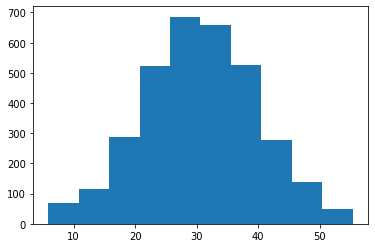

In [356]:
plt.hist(x['Day Charge'])

In [362]:
from ggplot import *

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

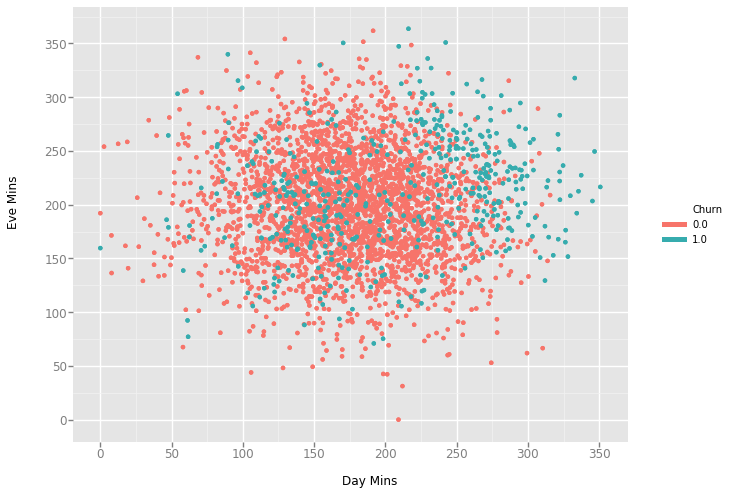

<ggplot: (166342271096)>

In [369]:
a = ggplot(x, aes("Day Mins", "Eve Mins", color = "Churn")) + geom_point() + geom_jitter()
a

In [375]:
sns.pairplot(x["Day Mins"],hue= 'Churn')

TypeError: 'data' must be pandas DataFrame object, not: <class 'pandas.core.series.Series'>

In [379]:
y = x['Churn'].value_counts()
y

0.0    2850
1.0     483
Name: Churn, dtype: int64

In [ ]:
pd.
-09